In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# **Download** the dataset 

In [0]:
!wget -P gdrive/My\ Drive /content/sample_data/Project\ CNN / https://vision.eng.au.dk/?download=/data/WeedData/Nonsegmented.zip

/content/sample_data/Project CNN: Scheme missing.
/: Scheme missing.
--2020-02-19 04:56:13--  https://vision.eng.au.dk/?download=/data/WeedData/Nonsegmented.zip
Resolving vision.eng.au.dk (vision.eng.au.dk)... 130.225.18.133
Connecting to vision.eng.au.dk (vision.eng.au.dk)|130.225.18.133|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /data/WeedData/Nonsegmented.zip [following]
--2020-02-19 04:56:14--  https://vision.eng.au.dk/data/WeedData/Nonsegmented.zip
Reusing existing connection to vision.eng.au.dk:443.
HTTP request sent, awaiting response... 200 OK
Length: 1748383102 (1.6G) [application/zip]
Saving to: ‘gdrive/My Drive/index.html?download=%2Fdata%2FWeedData%2FNonsegmented.zip’

wnload=%2Fdata%2FWe  98%[==================> ]   1.60G   780KB/s    eta 37s    

In [0]:
#Check if file is downloaded
!ls -l gdrive

total 4
drwxr-xr-x 2 root root 4096 Feb  9 11:33 'My Drive'


# **Unzip Downloaded File**

In [0]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
#!unzip /content/gdrive/My Drive/Seed Nonsegmented.zip -d /content/gdrive/My Drive
!unzip -q "/content/gdrive/My Drive/Seed Nonsegmented.zip"

In [0]:
!ls Nonsegmented

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherd’s Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [0]:
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

In [0]:
#save the path into variable to use it easily next times.
TRAin_DATA_FOLDER= "/content/Nonsegmented"

# **Read images and remove missing values save images in images list**

In [0]:
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)
        

In [0]:
len(images) # number of all images

5544


**resizing images**

In [0]:
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res


In [0]:

#save resized images into images.
images = [resize_images(img) for img in images]

In [0]:
images[0].shape

(256, 256, 3)

**number of images in each class**


In [0]:
#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

images shape:  (5544, 256, 256, 3)
classes shape:  (5544,)
number of Fat Hen images is  -> 538
number of Cleavers images is  -> 335
number of Scentless Mayweed images is  -> 607
number of Maize images is  -> 257
number of Shepherd’s Purse images is  -> 274
number of Small-flowered Cranesbill images is  -> 576
number of Loose Silky-bent images is  -> 766
number of Black-grass images is  -> 310
number of Sugar beet images is  -> 463
number of Charlock images is  -> 452
number of Common wheat images is  -> 253
number of Common Chickweed images is  -> 713


**plot the distrbution of number of images**

Text(0.5, 0.98, 'Categorical Plotting')

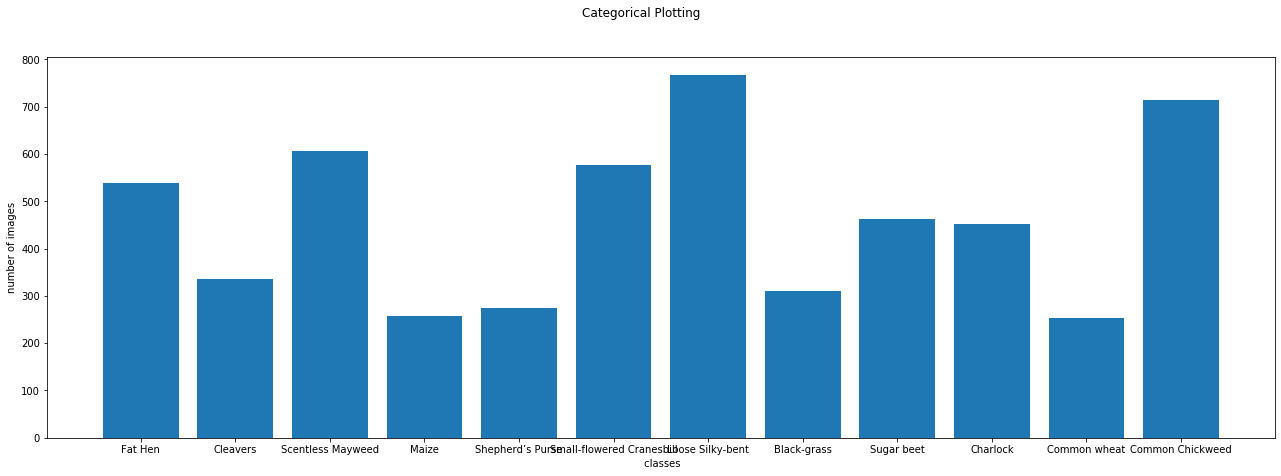

In [0]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

**Label encoder**

In [0]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [0]:
y[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

Spliting data into training and testing set
training set : 70%
testing set: 30% 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)
X_train.shape

(3880, 256, 256, 3)

Create validation set
split test data into 50% test, 50% validation

In [0]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [0]:
print(X_test.shape)
print(X_val.shape)

(832, 256, 256, 3)
(832, 256, 256, 3)


# **CNN MODEL**


In [0]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))



model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 32)      2432      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)       

In [0]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [0]:

# I put epochs = 70 and I waited until it reach a acceptable accuracy for me then I stopped the training at this point.
model.fit(X_train, y_train, epochs = 70, validation_data = (X_val,Y_val),batch_size = batch_size)

Train on 3880 samples, validate on 832 samples
Epoch 1/70
3880/3880 [==============================] - 16s 4ms/step - loss: 11.2556 - acc: 0.1126 - val_loss: 2.4470 - val_acc: 0.1466
Epoch 2/70
3880/3880 [==============================] - 15s 4ms/step - loss: 2.4413 - acc: 0.1639 - val_loss: 2.3056 - val_acc: 0.2909
Epoch 3/70
3880/3880 [==============================] - 15s 4ms/step - loss: 2.2187 - acc: 0.2425 - val_loss: 2.3654 - val_acc: 0.1550
Epoch 4/70
3880/3880 [==============================] - 15s 4ms/step - loss: 2.0933 - acc: 0.2974 - val_loss: 2.0556 - val_acc: 0.4014
Epoch 5/70
3880/3880 [==============================] - 15s 4ms/step - loss: 1.8616 - acc: 0.3724 - val_loss: 1.7982 - val_acc: 0.4111
Epoch 6/70
3880/3880 [==============================] - 15s 4ms/step - loss: 1.7075 - acc: 0.4155 - val_loss: 1.5982 - val_acc: 0.4567
Epoch 7/70
3880/3880 [==============================] - 15s 4ms/step - loss: 1.4845 - acc: 0.4856 - val_loss: 1.6785 - val_acc: 0.3666
Epoch 8

In [0]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5715112163900182
Test accuracy: 0.8100961670279503
